 #  <p style="text-align: center;">Problem Statement: Bank Churn Prediction</p>

## Objective: Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not.

Context:

Businesses like banks which provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

Data Description:

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance etc. Link to the Kaggle project site: https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

Points Distribution:

The points distribution for this case is as follows:

Read the dataset
<p>Drop the columns which are unique for all users like IDs (5points)
<p>Distinguish the features and target variable(5points)
<p>Divide the data set into training and test sets (5points)
<p>Normalize the train and test data (10points)
<p>Initialize & build the model. Identify the points of improvement and implement the same. Note that you need to demonstrate at least two models(the original and the improved one) and highlight the differences to complete this point. You can also demonstrate more models. (20points)
<p>Predict the results using 0.5 as a threshold. Note that you need to first predict the probability and then predict classes using the given threshold (10points)
<p>Print the Accuracy score and confusion matrix (5points)


In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score


# Using Tensorflow Keras instead of the original Keras

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# reading the CSV file into pandas dataframe
df = pd.read_csv("bank.csv")  

pd.isnull(df).count()

RowNumber          10000
CustomerId         10000
Surname            10000
CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Drop the columns which are unique for all users like IDs (5points)

In [4]:
df  = df.drop("RowNumber" , axis=1)
df  = df.drop("CustomerId" , axis=1)
df  = df.drop("Surname" , axis=1)

In [5]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [7]:
# convert Geneder to numric values
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [8]:
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

In [9]:
# convert the numeric values to one-hot code to remove the order

df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

In [10]:
df.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1
5,645,44,8,113755.78,2,1,0,149756.71,1,1,0,1
6,822,50,7,0.00,2,1,1,10062.80,0,1,0,0
7,376,29,4,115046.74,4,1,0,119346.88,1,0,1,0
8,501,44,4,142051.07,2,0,1,74940.50,0,1,0,0
9,684,27,2,134603.88,1,1,1,71725.73,0,1,0,0


In [11]:
df['Gender_Male'].value_counts()

1    5457
0    4543
Name: Gender_Male, dtype: int64

In [12]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.545700,0.250900,0.247700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.497932,0.433553,0.431698
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,1.000000,0.000000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,1.000000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000


In [13]:
df.dtypes

CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Gender_Male            uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

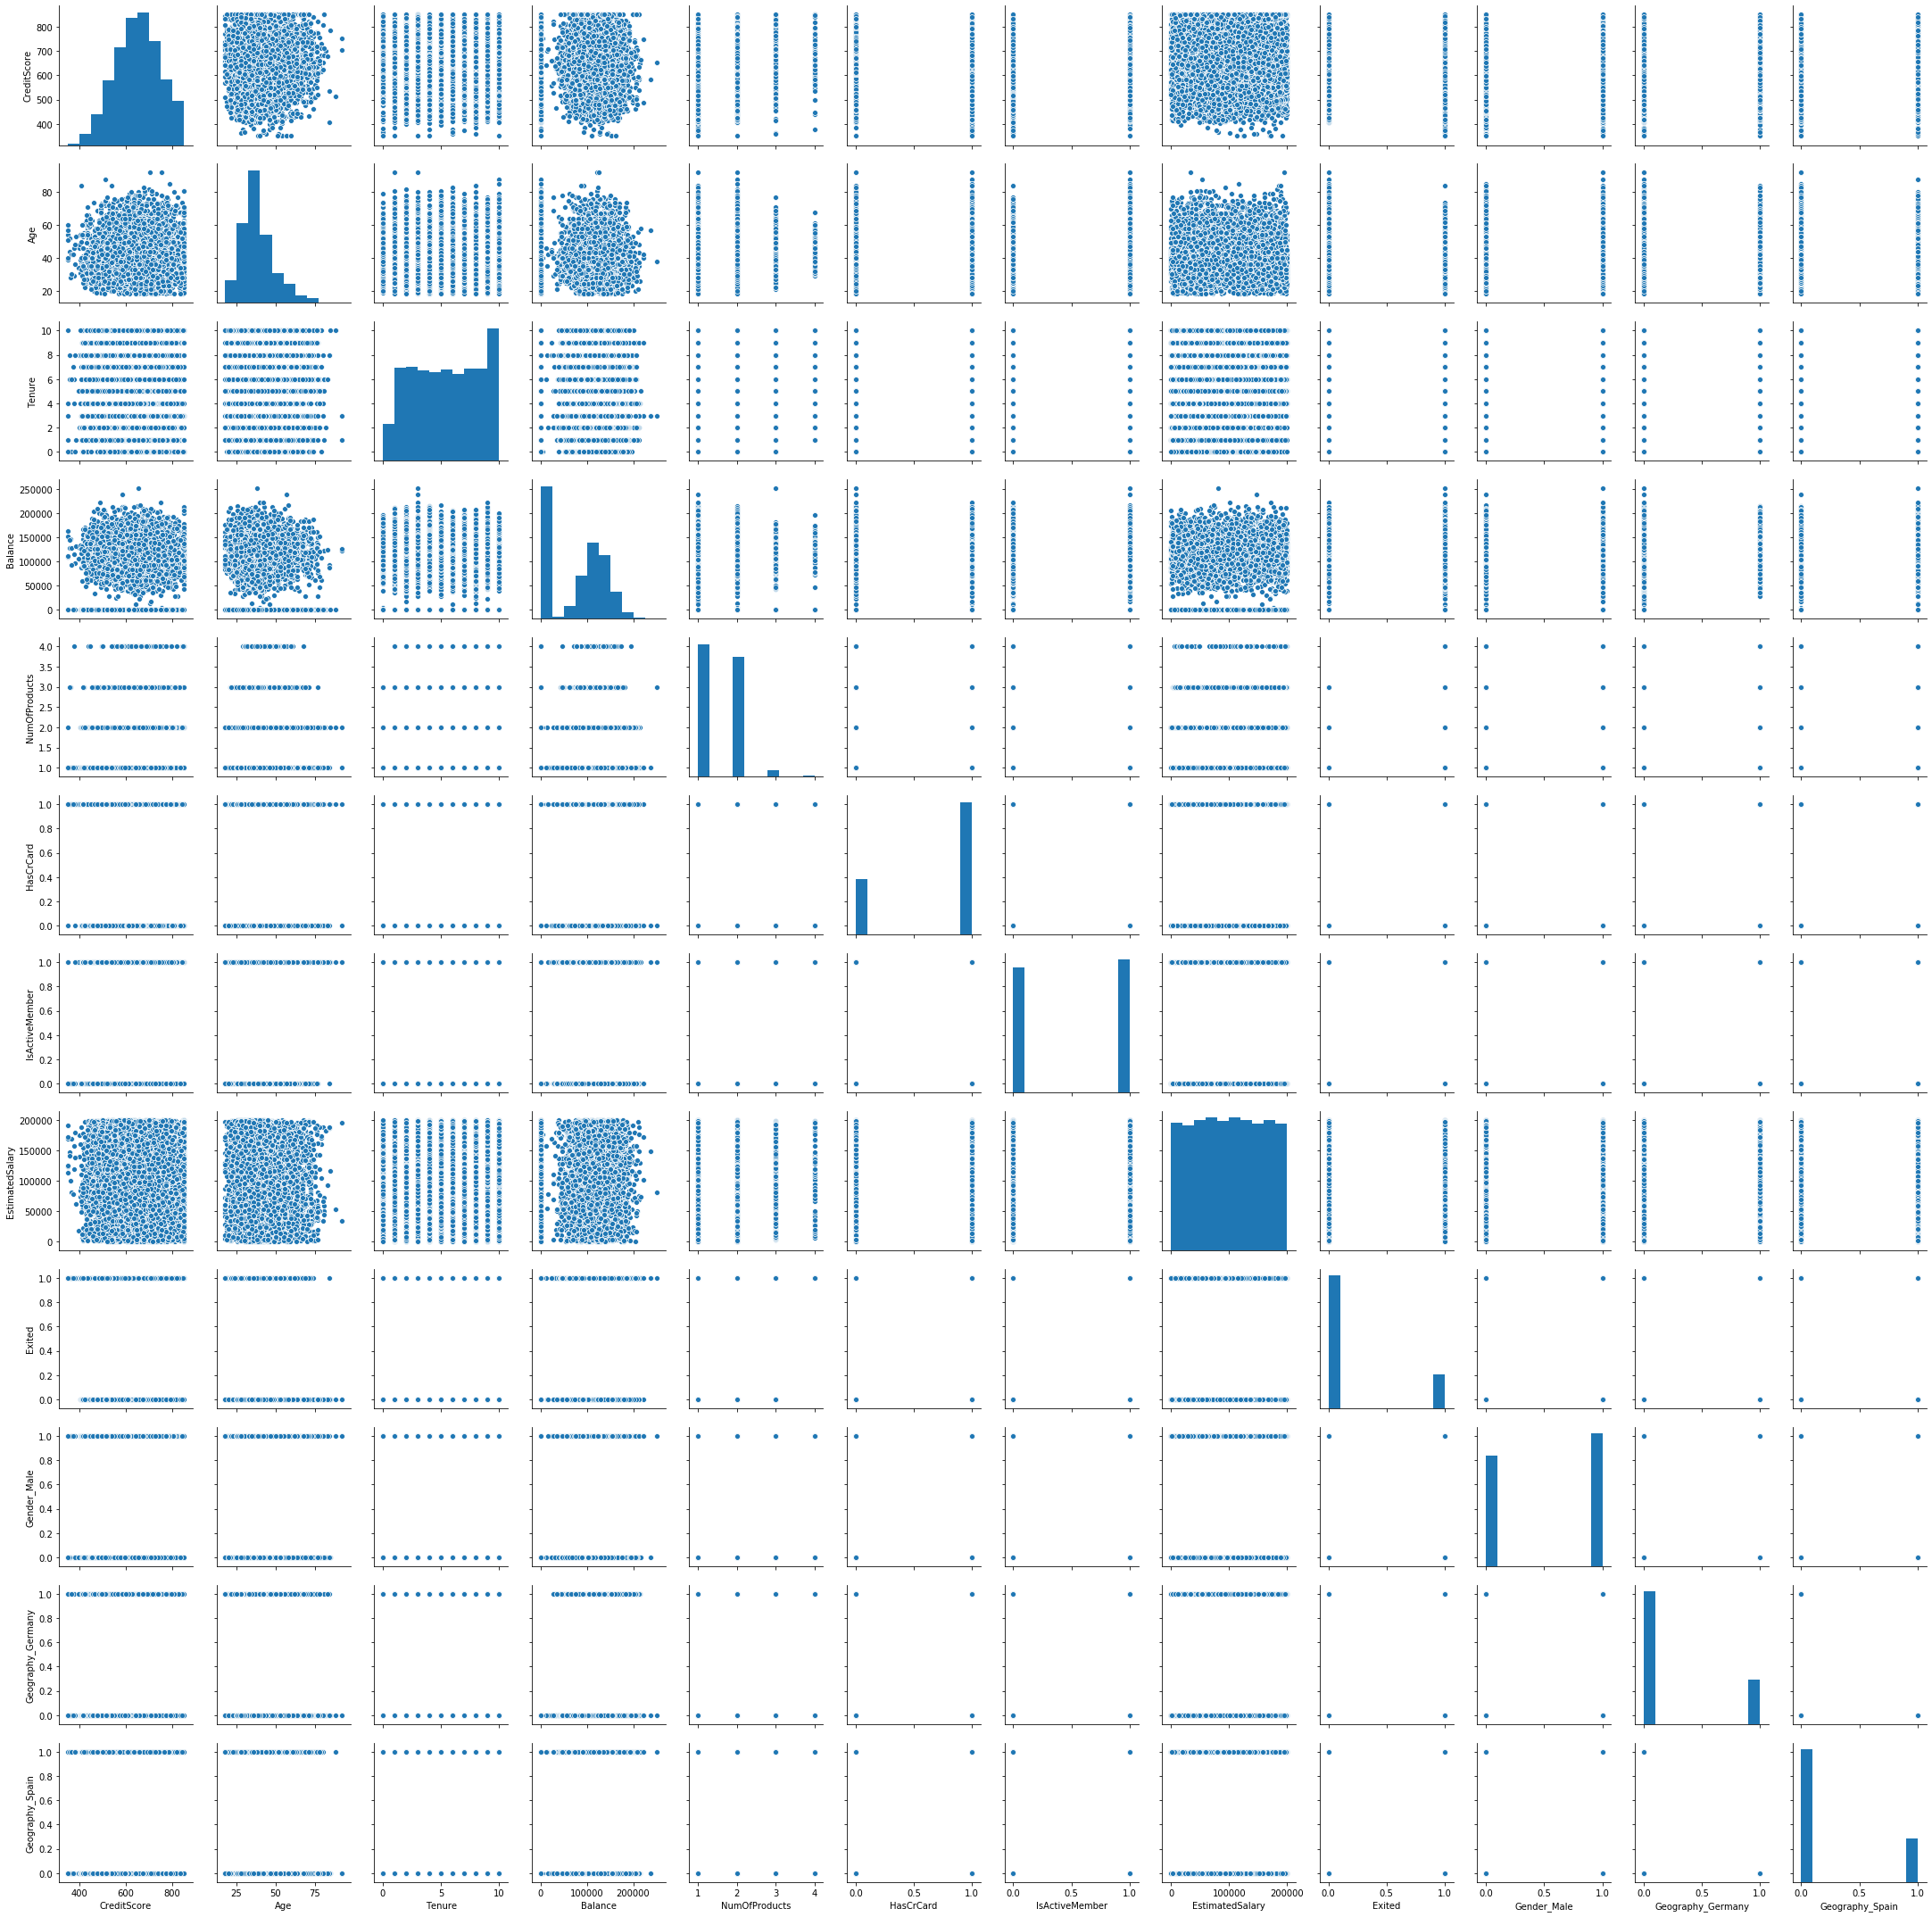

In [14]:
sns.pairplot(data=df)

## Distinguish the features and target variable(5points)

In [15]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split

X = df.drop('Exited',axis=1)     # Predictor feature columns
y = df['Exited']   # Predicted

## Divide the data set into training and test sets (5points)

In [16]:
# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

y_train =  np.array(y_train)
y_test =  np.array(y_test)

In [17]:
print(f'training shapes: {X_train.shape}, {y_train.shape}')
print(f'testing shapes: {X_test.shape}, {y_test.shape}')

training shapes: (7000, 11), (7000,)
testing shapes: (3000, 11), (3000,)


## Normalize the train and test data (10points)

In [18]:
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

## Initialize & build the model. Identify the points of improvement and implement the same. Note that you need to demonstrate at least two models(the original and the improved one) and highlight the differences to complete this point. You can also demonstrate more models. (20points)|

## Model1 - 1 hidden layer, activation=relu, optimizer=adam, epochs=100, batch size=100

In [19]:
# Initialize the constructor
model = Sequential()

In [20]:
# Define model architecture

#hidden layer
model.add(Dense(12,activation='relu'))

#output layer
model.add(Dense(1, activation = 'sigmoid')) 

In [21]:
#model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [22]:
history = model.fit(X_train, y_train, batch_size=300, epochs=100, validation_split=0.1, verbose=1)

Train on 6300 samples, validate on 700 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
6300/6300 [==============================] - 0s 39us/sample - loss: 0.6055 - acc: 0.7763 - val_loss: 0.5969 - val_acc: 0.7843
Epoch 2/100
6300/6300 [==============================] - 0s 5us/sample - loss: 0.5782 - acc: 0.7879 - val_loss: 0.5705 - val_acc: 0.7929
Epoch 3/100
6300/6300 [==============================] - 0s 7us/sample - loss: 0.5556 - acc: 0.7906 - val_loss: 0.5484 - val_acc: 0.7929
Epoch 4/100
6300/6300 [==============================] - 0s 7us/sample - loss: 0.5366 - acc: 0.7919 - val_loss: 0.5300 - val_acc: 0.7943
Epoch 5/100
6300/6300 [==============================] - 0s 7us/sample - loss: 0.5207 - acc: 0.7924 - val_loss: 0.5145 - val_acc: 0.7943
Epoch 6/100
6300/6300 [==============================] - 0s 7us/sample - loss: 0.5074 - acc: 0.7924 - val_loss: 0.5011 - val_acc: 0.7943
Epoch 7/100
6300/6300 [==============================] - 0s 7us/sample - loss: 0.4

6300/6300 [==============================] - 0s 5us/sample - loss: 0.3847 - acc: 0.8294 - val_loss: 0.3923 - val_acc: 0.8257
Epoch 59/100
6300/6300 [==============================] - 0s 6us/sample - loss: 0.3840 - acc: 0.8302 - val_loss: 0.3920 - val_acc: 0.8257
Epoch 60/100
6300/6300 [==============================] - 0s 5us/sample - loss: 0.3835 - acc: 0.8294 - val_loss: 0.3913 - val_acc: 0.8243
Epoch 61/100
6300/6300 [==============================] - 0s 5us/sample - loss: 0.3828 - acc: 0.8294 - val_loss: 0.3906 - val_acc: 0.8243
Epoch 62/100
6300/6300 [==============================] - 0s 4us/sample - loss: 0.3823 - acc: 0.8289 - val_loss: 0.3901 - val_acc: 0.8243
Epoch 63/100
6300/6300 [==============================] - 0s 5us/sample - loss: 0.3817 - acc: 0.8290 - val_loss: 0.3897 - val_acc: 0.8243
Epoch 64/100
6300/6300 [==============================] - 0s 5us/sample - loss: 0.3812 - acc: 0.8303 - val_loss: 0.3897 - val_acc: 0.8243
Epoch 65/100
6300/6300 [=======================

In [23]:
loss, acc = model.evaluate(X_test, y_test, verbose=1)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

3000/3000 [==============================] - 0s 16us/sample - loss: 0.3556 - acc: 0.8517
Accuracy: 0.852
Loss: 0.356


In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  144       
_________________________________________________________________
dense_1 (Dense)              multiple                  13        
Total params: 157
Trainable params: 157
Non-trainable params: 0
_________________________________________________________________


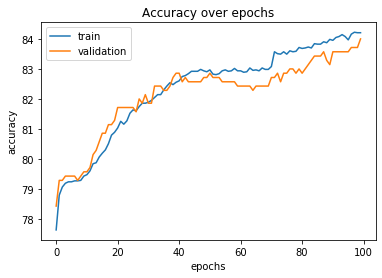

In [25]:
plt.plot(np.array(history.history['acc']) * 100)
plt.plot(np.array(history.history['val_acc']) * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.title('Accuracy over epochs')
plt.show()

## Model2 (optimizated) - 2 hidden layer, activation=tanh, optimizer=RMSprop, epochs=30, batch size=200

In [26]:
# Initialize the constructor
model = Sequential()

In [27]:
# Define model architecture

#hidden layer
model.add(Dense(10,activation='tanh'))
model.add(Dense(7, activation ='tanh'))

#output layer
model.add(Dense(1, activation = 'sigmoid')) 

In [28]:
#model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.compile(loss='binary_crossentropy',optimizer='RMSprop',metrics=['accuracy'])

In [29]:
history = model.fit(X_train, y_train, batch_size=200, epochs=30, validation_split=0.1, verbose=1)

Train on 6300 samples, validate on 700 samples
Epoch 1/30
6300/6300 [==============================] - 0s 44us/sample - loss: 0.7134 - acc: 0.5235 - val_loss: 0.6694 - val_acc: 0.5614
Epoch 2/30
6300/6300 [==============================] - 0s 8us/sample - loss: 0.6211 - acc: 0.6500 - val_loss: 0.5865 - val_acc: 0.7114
Epoch 3/30
6300/6300 [==============================] - 0s 11us/sample - loss: 0.5551 - acc: 0.7468 - val_loss: 0.5230 - val_acc: 0.7757
Epoch 4/30
6300/6300 [==============================] - 0s 10us/sample - loss: 0.5045 - acc: 0.7813 - val_loss: 0.4777 - val_acc: 0.7986
Epoch 5/30
6300/6300 [==============================] - 0s 11us/sample - loss: 0.4685 - acc: 0.7933 - val_loss: 0.4479 - val_acc: 0.8129
Epoch 6/30
6300/6300 [==============================] - 0s 9us/sample - loss: 0.4460 - acc: 0.7995 - val_loss: 0.4308 - val_acc: 0.8029
Epoch 7/30
6300/6300 [==============================] - 0s 12us/sample - loss: 0.4329 - acc: 0.8043 - val_loss: 0.4216 - val_acc: 0.8

In [30]:
loss, acc = model.evaluate(X_test, y_test, verbose=1)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

3000/3000 [==============================] - 0s 23us/sample - loss: 0.3498 - acc: 0.8580
Accuracy: 0.858
Loss: 0.350


In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              multiple                  120       
_________________________________________________________________
dense_3 (Dense)              multiple                  77        
_________________________________________________________________
dense_4 (Dense)              multiple                  8         
Total params: 205
Trainable params: 205
Non-trainable params: 0
_________________________________________________________________


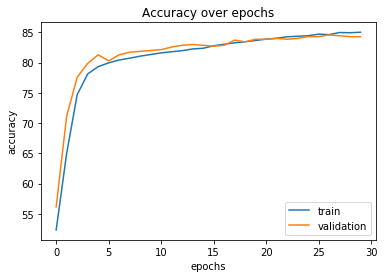

In [32]:
plt.plot(np.array(history.history['acc']) * 100)
plt.plot(np.array(history.history['val_acc']) * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.title('Accuracy over epochs')
plt.show()

In [33]:
## Model1 - 1 hidden layer, activation=relu, optimizer=adam, epochs=100, batch size=100

## Model2 (optimizated) - 2 hidden layer, activation=tanh, optimizer=RMSprop, epochs=30, batch size=200

#Model 2 has almost the same accuracy as Model1 but is cmoutationally less expensive.

## Predict the results using 0.5 as a threshold. Note that you need to first predict the probability and then predict classes using the given threshold (10points)

In [34]:
y_pred = model.predict(X_test)

In [35]:
y_pred = (y_pred > 0.5).astype(int)

## Print the Accuracy score and confusion matrix (5points)

In [36]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Confusion Matrix


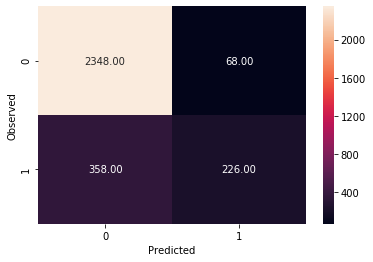

None

Recall: 0.386986301369863

Precision: 0.7687074829931972

F1 Score: 0.5148063781321185

Roc Auc Score: 0.6794203030028123


In [37]:

print('Confusion Matrix')
print(draw_cm(y_test,y_pred))
print()
print("Recall:",recall_score(y_test,y_pred))
print()
print("Precision:",precision_score(y_test,y_pred))
print()
print("F1 Score:",f1_score(y_test,y_pred))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_pred))

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [39]:
print ('Accuracy:', ((cm[0][0]+cm[1][1])*100)/(len(y_test)), '% of testing data was classified correctly')

Accuracy: 85.8 % of testing data was classified correctly
